# Coding Block 3 - Decision Trees

### Load the packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
'''
...
'''

'\n...\n'

### Read the dataset (the complete data with outliers and missing data). 

In [5]:
df = pd.read_csv('../data/df_imputed_clean.csv')

### Build a decision tree model
Think of training-test distinction -- with cross validation.

Cross-Validation Accuracy Scores: [0.71794872 0.71794872 0.75213675 0.67241379 0.70689655]
Mean CV Accuracy: 0.7135


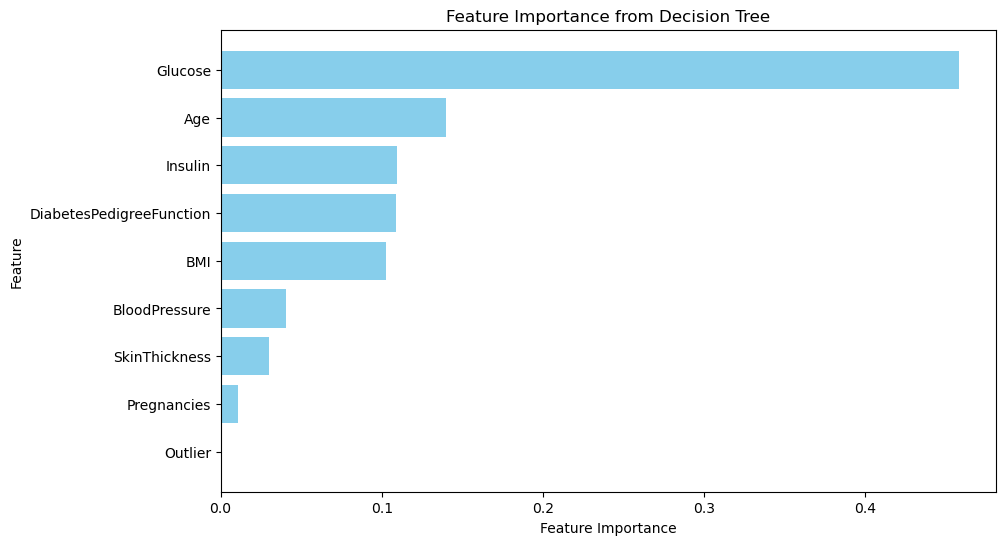

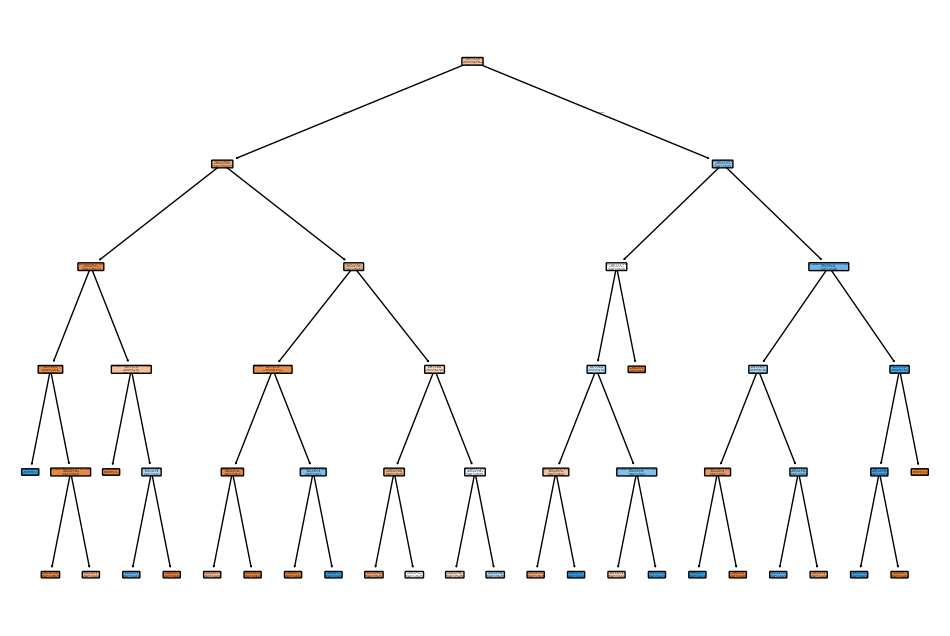

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming 'df' contains the dataset and 'target' is the label column
X = df.drop(columns=['Outcome', 'Multivariate_Outlier', 'Mahalanobis_Distance', 'Unnamed: 0'])  # Features
y = df['Outcome']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Train the model on the full training data
model.fit(X_train, y_train)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.show()


### Evaluate the prediction model using a classification report
Does the model look like a successful model?

## Visualize the Decision Tree

One way to  do this is using <b>

    <i>from sklearn.tree import plot_tree</i>

Alternative way of plotting the decision tree using

    <i> from sklearn.tree import export_graphviz import pydotplus </i>

### Make Decision Rules

Make the decision rules explicit. You can use (e.g.)
    <i> from sklearn.tree import export_text </i>